# Scientific Computing - Qualification

#### Name: Stanley Nathanael Wijaya
#### Assistant Code: LC128
#### NIM: 27022171<b>25</b>
#### Region: Alam Sutera

## Gauss-Seidel Linear Equation

### Library and Data

In [314]:
import numpy as np

In [315]:
Xs = [
    [
      [4, 2, -1],
      [1, -5, 2],
      [2, -1, -4]
    ],
    [
      [3, 4, 5],
      [-3, 7, -4],
      [1, -4, -2]
    ],
    [
      [9, -2, 3, 2],
      [2, 8, -2, 3],
      [-3, 2, 11, -4],
      [-2, 3, 2, 10]
    ]
]
Ys = [
    [41, -10, 1],
    [34, -32, 62],
    [55, -14, 12, -21]
]

### Diagonally Dominant Function

In [316]:
def diagonally_dominant(x):
    x = np.array(x)

    diag = np.diag(np.abs(x))

    sum = np.sum(x, axis=1) - diag

    if np.all(sum <= diag):
        return True
    else:
        return False

In [317]:
for i in range (len(Xs)):
    print (diagonally_dominant(Xs[i]))

True
False
True


### Gauss Seidel Function

In [318]:
def gauss_seidel(x, y, e = 0.025, max_iter=15):
    x = np.array (x)
    y = np.array(y)

    diag = np.diag(x)

    x = -x

    np.fill_diagonal(x, 0)

    temp = np.zeros(len(x))

    for i in range (max_iter):
        x_new = np.array(temp)

        for j, row in enumerate(x):
            x_new[j] = (y[j] + np.dot(row, x_new))/diag[j]

        print (f'Iteration {i+1} = {x_new}')

        distance = np.sqrt(np.dot(x_new-temp, x_new-temp))

        if distance < e:
            return True
        else:
            temp = x_new
    return False

In [319]:
for i, (x, y) in enumerate(zip(Xs, Ys)):
    print (f'Equation {i+1}')
    print (f'A = {x} and y = {y}')

    if diagonally_dominant(x):
        if gauss_seidel(x, y):
            print ('Diagoanlly Dominant & Convergent\n')
        else:
            print ('Diagoanlly Dominant but Not convergent!\n')

    else:
        print ('Not diagonally dominant & Not convergent!\n')

Equation 1
A = [[4, 2, -1], [1, -5, 2], [2, -1, -4]] and y = [41, -10, 1]
Iteration 1 = [10.25    4.05    3.8625]
Iteration 2 = [9.190625   5.383125   2.99953125]
Iteration 3 = [8.30832031 4.86147656 2.68879102]
Iteration 4 = [8.49145947 4.7738083  2.80227766]
Iteration 5 = [8.56366526 4.83364412 2.8234216 ]
Iteration 6 = [8.53903334 4.83717531 2.81022284]
Iteration 7 = [8.53396806 4.83088275 2.80926334]
Diagoanlly Dominant & Convergent

Equation 2
A = [[3, 4, 5], [-3, 7, -4], [1, -4, -2]] and y = [34, -32, 62]
Not diagonally dominant & Not convergent!

Equation 3
A = [[9, -2, 3, 2], [2, 8, -2, 3], [-3, 2, 11, -4], [-2, 3, 2, 10]] and y = [55, -14, 12, -21]
Iteration 1 = [ 6.11111111 -3.27777778  3.35353535 -0.56515152]
Iteration 2 = [ 4.39046016 -1.79729938  2.40957938 -1.16463403]
Iteration 3 = [ 5.16732568 -2.00269881  2.44080351 -0.95388592]
Iteration 4 = [ 5.06444041 -2.04820201  2.49765287 -0.97218189]
Iteration 5 = [ 5.03944457 -2.02087972  2.47921505 -0.98169018]
Iteration 6 = 

## Least Square Regression & Plotting

### Library

In [320]:
import numpy as np
from matplotlib import pyplot as plt

### Data & Matrix

In [321]:
# Data (Random)

x = np.linspace(1, 50, 50)
y = np.array([2.3 * xi + np.random.normal(0, 3) for xi in x])

# Matrix

A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

### Direct Inverse Method

m = [2.22542492]
b = [2.32077356]
y = [2.22542492]x + [2.32077356]


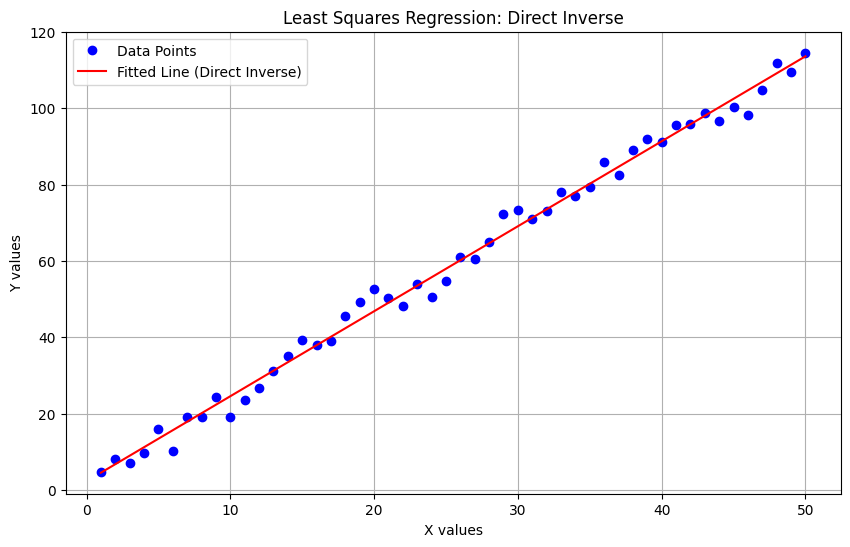

In [322]:
# Direct Inverse

beta_direct = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
m_direct = beta_direct[0]
b_direct = beta_direct[1]

print (f'm = {m_direct}')
print (f'b = {b_direct}')
print (f'y = {m_direct}x + {b_direct}')

# Plot

plt.figure(figsize=(10, 6))
plt.plot(x, y, "bo", label="Data Points")
plt.plot(x, m_direct * x + b_direct, "r-", label="Fitted Line (Direct Inverse)")
plt.title("Least Squares Regression: Direct Inverse")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()

### Pseudoinverse Method

m = [2.22542492]
b = [2.32077356]
y = [2.22542492]x + [2.32077356]


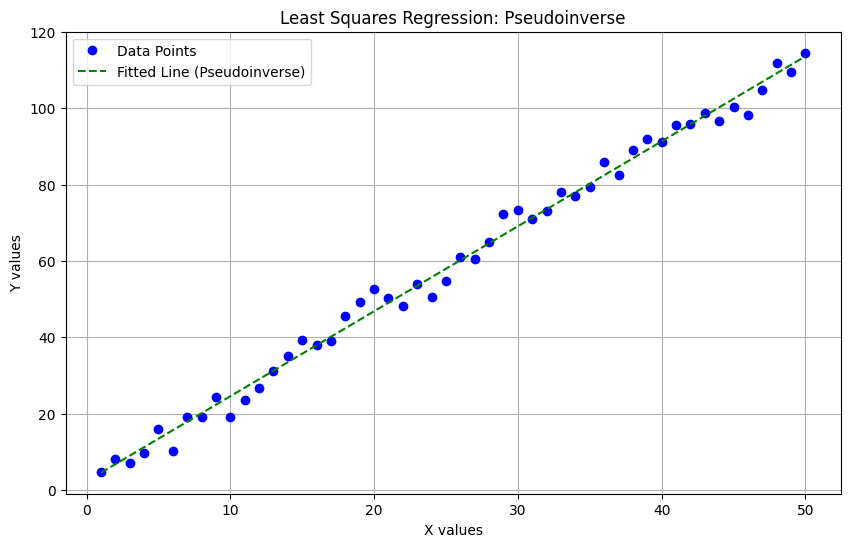

In [323]:
# Pseudoinverse

pinv = np.linalg.pinv(A)
beta_pseudo = np.dot(pinv, y)
m_pseudo = beta_pseudo[0]
b_pseudo = beta_pseudo[1]

print (f'm = {m_pseudo}')
print (f'b = {b_pseudo}')
print (f'y = {m_pseudo}x + {b_pseudo}')

# Plot

plt.figure(figsize=(10, 6))
plt.plot(x, y, "bo", label="Data Points")
plt.plot(x, m_pseudo * x + b_pseudo, "g--", label="Fitted Line (Pseudoinverse)")
plt.title("Least Squares Regression: Pseudoinverse")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()

## Root Findings

### Library & Equation Formula

In [324]:
import numpy as np

def f(x):
    return x**4 - 4*x**3 + 6*x**2 - 4*x + 1

def g(x):
    return 4*x**3 - 12*x**2 + 12*x - 4

### Bisection Method

In [325]:
def bisection(f, a, b, tol=0.025, max_iter=15):
    if np.sign(f(a)) == np.sign(f(b)):
        print('Coordinate Interval Invalid')
        return None
    
    iter_count = 0
    while iter_count < max_iter:
        c = (a + b) / 2
        print(f'Iteration ({iter_count + 1}) --> c = {c}, f(c) = {f(c)}')

        if np.abs(f(c)) < tol:
            return c
        elif np.sign(f(a)) == np.sign(f(c)):
            a = c
        else:
            b = c

        iter_count += 1

    return c

root_bisection = bisection(f, 1, 10)
print(f"Root found using Bisection Method: {root_bisection}")

Iteration (1) --> c = 5.5, f(c) = 410.0625
Iteration (2) --> c = 3.25, f(c) = 25.62890625
Iteration (3) --> c = 2.125, f(c) = 1.601806640625
Iteration (4) --> c = 1.5625, f(c) = 0.1001129150390625
Iteration (5) --> c = 1.28125, f(c) = 0.006257057189941406
Root found using Bisection Method: 1.28125


### Newton Raphson

In [326]:
def newton_raphson(f, g, x0, tol=0.025, max_iter=15):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / g(x)
        print(f'Iteration ({i+1}) --> x = {x_new}, f(x) = {f(x_new)}')
        
        if np.abs(f(x_new)) < tol:
            return x_new
        x = x_new

    return x

root_newton = newton_raphson(f, g, 2)
print(f"Root found using Newton Raphson Method: {root_newton}")

Iteration (1) --> x = 1.75, f(x) = 0.31640625
Iteration (2) --> x = 1.5625, f(x) = 0.1001129150390625
Iteration (3) --> x = 1.421875, f(x) = 0.03167635202407837
Iteration (4) --> x = 1.31640625, f(x) = 0.010022595757618546
Root found using Newton Raphson Method: 1.31640625


## Riemann Integral

### Library and Polynomial Equation

In [327]:
import numpy as np

def f(x):
    return 2*x**4 - 3*x**3 + 5*x**2 - x + 7

### Data

In [328]:
# Lowerbound and Upperbound (change this to see the difference especially for left and right riemann)

a = -10
b = 5

# Number of grid points

n = 3000

# Data

width = (b - a) / (n - 1)

x = np.linspace(a, b, n)

y = f(x)

### Left Riemann Sum

In [329]:
left_riemann = width * np.sum(y[:n-1])
print(f'Left Riemann Sum: {left_riemann}')

Left Riemann Sum: 50355.07675115829


### Right Riemann Sum

In [330]:
right_riemann = width * np.sum(y[1:n])
print(f'Right Riemann Sum: {right_riemann}')

Right Riemann Sum: 50242.46421364578


### Midpoint Riemann Sum

In [331]:
x_mid = (x[:n-1] + x[1:n]) / 2
y_mid = f(x_mid)
mid_riemann = width * np.sum(y_mid)
print(f'Midpoint Riemann Sum: {mid_riemann}')

Midpoint Riemann Sum: 50298.73975879922


### Trapezoidal Rule

In [332]:
trapezoid = width / 2 * (y[0] + 2 * np.sum(y[1:n-1]) + y[n-1])
print(f'Trapezoidal Rule: {trapezoid}')

Trapezoidal Rule: 50298.770482402026
